<a href="https://colab.research.google.com/github/nithinivi/Deep_Learning_Discussion/blob/main/002_Convnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolution Neural Networks

https://docs.google.com/spreadsheets/d/1J91hQSDpMnOQnEmBJtEJuXpc9BerZcq-P_fAsLVhvrY/edit#gid=1797497498


![Convolution](https://raw.githubusercontent.com/vdumoulin/conv_arithmetic/master/gif/padding_strides.gif "Conv With Stride and padding")


- Batch Normalization 

<img src="https://raw.githubusercontent.com/hiromis/notes/master/lesson6/14.png" width=400>


<img src="https://raw.githubusercontent.com/hiromis/notes/master/lesson6/15.png" width=400>

In [2]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [3]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170500096/170498071 [==============================] - 2s 0us/step


In [67]:
def comp_conv2d(conv2d, X):
    # Here (1, 1) indicates that the batch size and the number of channels
    # are both 1
    X = tf.reshape(X, (1,) + X.shape + (1,))
    Y = conv2d(X)
    # Exclude the first two dimensions that do not interest us: examples and
    # channels
    return tf.reshape(Y, Y.shape[1:3])

# Note that here 1 row or column is padded on either side, so a total of 2
# rows or columns are added
conv2d = tf.keras.layers.Conv2D(1, kernel_size=3, padding='same', strides=2)
X = tf.random.uniform(shape=(8, 8))
comp_conv2d(conv2d, X).shape

TensorShape([4, 4])

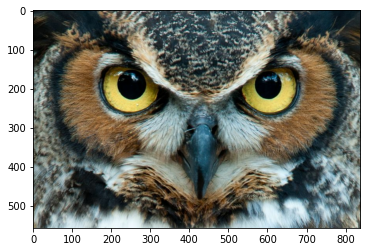

In [45]:
import requests
url = 'https://i.pinimg.com/originals/b5/60/0f/b5600f14ff810ef7ee30bc38e0a7e8b9.jpg'
img = tf.image.decode_jpeg(
        requests.get(url).content, channels=3, name="jpeg_reader")
plt.imshow(image)

In [64]:
k = tf.constant([[1, -1,1], [0, 0,0], [1, -1,1]])/101
k = tf.broadcast_to(k, [1,3,3, 3])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


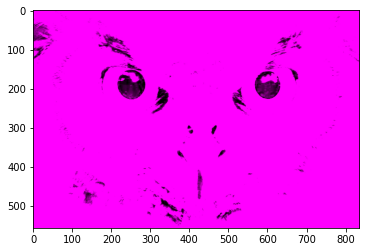

In [65]:
img = tf.expand_dims(img, axis=0)
img = tf.cast(img, tf.float32) 
k = tf.cast(k, tf.float32) 
act = tf.nn.conv2d(
    img, k, strides=1, padding='VALID'
)
out = tf.reshape(act, act.shape[-3:])
plt.imshow(out, cmap="gray")





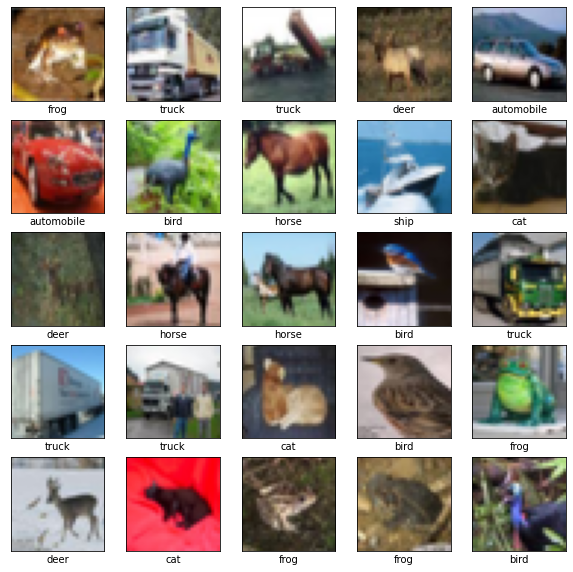

In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [5]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

In [6]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 72s 45ms/step - loss: 1.5079 - accuracy: 0.4497 - val_loss: 1.2694 - val_accuracy: 0.5416
Epoch 2/10
1563/1563 [==============================] - 71s 45ms/step - loss: 1.1414 - accuracy: 0.5939 - val_loss: 1.0552 - val_accuracy: 0.6245
Epoch 3/10
1563/1563 [==============================] - 71s 45ms/step - loss: 0.9921 - accuracy: 0.6511 - val_loss: 0.9823 - val_accuracy: 0.6448
Epoch 4/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.8910 - accuracy: 0.6897 - val_loss: 0.9281 - val_accuracy: 0.6795
Epoch 5/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.8171 - accuracy: 0.7131 - val_loss: 0.9440 - val_accuracy: 0.6754
Epoch 6/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.7584 - accuracy: 0.7339 - val_loss: 0.8711 - val_accuracy: 0.7046
Epoch 7/10
1563/1563 [==============================] - 71s 46ms/step - loss: 0.7084 - accuracy: 0.7496 - val_loss: 0.8712 -

313/313 - 4s - loss: 0.8851 - accuracy: 0.7139


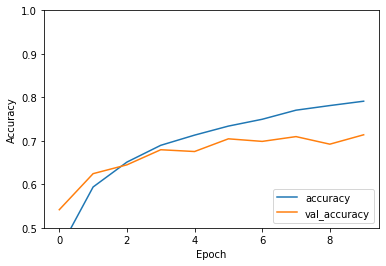

In [7]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

- what convolutions layer are learning (Fergrus Paper)


<img src="https://raw.githubusercontent.com/hiromis/notes/master/lesson1/100.png" width=400>


<img src="https://raw.githubusercontent.com/hiromis/notes/master/lesson1/125.png" width=400>

<img src="https://raw.githubusercontent.com/hiromis/notes/master/lesson1/127.png" width=400>

# References

- http://colah.github.io/posts/2014-07-Understanding-Convolutions/